/tmp/ipython-input-104404435.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)



📊 Model Performance Comparison:

                 Model  Accuracy   ROC-AUC  F1-Score  Precision    Recall
2    Gradient Boosting  0.806246  0.841579  0.590705   0.672355  0.526738
0  Logistic Regression  0.799148  0.840280  0.591631   0.642633  0.548128
3              XGBoost  0.798439  0.836608  0.579882   0.649007  0.524064
1        Random Forest  0.787083  0.825083  0.549550   0.626712  0.489305


/tmp/ipython-input-104404435.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Accuracy", y="Model", data=results_df, palette="viridis")


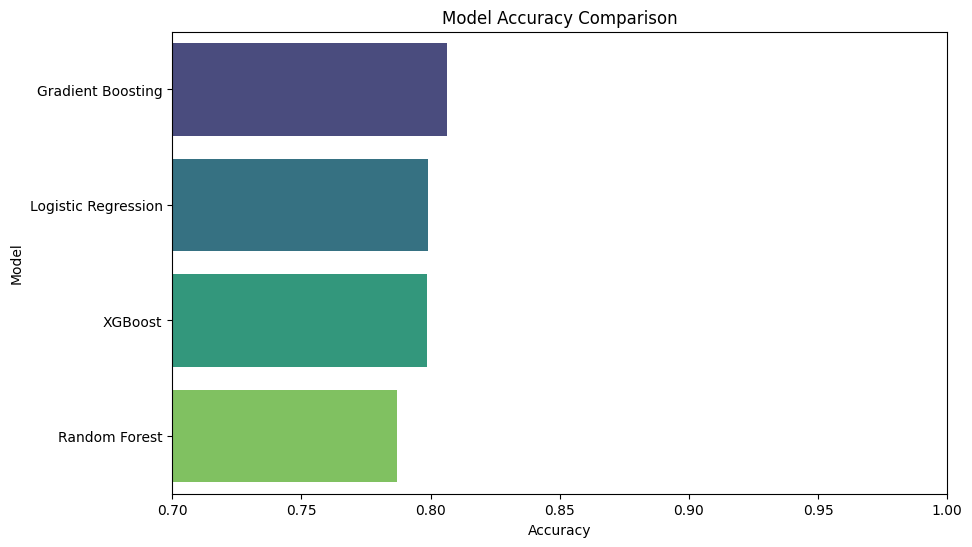


🏆 Best Model: Gradient Boosting
💾 Saved successfully!


In [4]:
# ==========================================
# Customer Churn Prediction - Model Comparison
# ==========================================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os

# Step 1: Load and preprocess dataset
df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

df.drop("customerID", axis=1, inplace=True)
df['TotalCharges'] = df['TotalCharges'].replace(" ", np.nan).astype(float)
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Encode categorical features
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Split data
X = df.drop("Churn", axis=1)
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=300, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=300, learning_rate=0.05, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=300, learning_rate=0.05, max_depth=5, subsample=0.8,
                             colsample_bytree=0.8, random_state=42, eval_metric='logloss')
}

# Step 3: Train and evaluate
results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    f1 = f1_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)

    results.append({
        "Model": name,
        "Accuracy": acc,
        "ROC-AUC": auc,
        "F1-Score": f1,
        "Precision": prec,
        "Recall": rec
    })

# Step 4: Results DataFrame
results_df = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)
print("\n📊 Model Performance Comparison:\n")
print(results_df)

# Step 5: Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x="Accuracy", y="Model", data=results_df, palette="viridis")
plt.title("Model Accuracy Comparison")
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.xlim(0.7, 1)
plt.show()

# Step 6: Save Best Model
best_model_name = results_df.iloc[0]["Model"]
best_model = models[best_model_name]

# Create 'models' directory if it doesn't exist
if not os.path.exists('models'):
    os.makedirs('models')

joblib.dump(best_model, f"models/best_model_{best_model_name.replace(' ', '_').lower()}.pkl")
joblib.dump(scaler, "models/scaler.pkl")

print(f"\n🏆 Best Model: {best_model_name}")
print("💾 Saved successfully!")

In [5]:
joblib.dump(X.columns, "model_features.pkl")


['model_features.pkl']